In [1]:
## This is a demo project to find statistical pattern of raw data

In [2]:
import numpy as np
import pandas as pd
# Visualization Libraries
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import seaborn as sns
from sklearn import datasets # for using built-in datasets
from sklearn import metrics # for checking the model accuracy
#To plot the graph embedded in the notebook
%matplotlib inline

In [3]:
evaluation_df=pd.read_excel('evaluation_dataset.xlsx')
evaluation_df
#please install openpyxl in pip before loading the excel file

,BCT Name,TS,TV,TA,FA,RE,SE,CA,MC,EE,PE,BI,JR,Ex,Im,SI,PV,PU,SC,TL (%)
0,Bitcoin,4.315789,4.315789,4.315789,5.684211,4.947368,5.315789,5.131579,4.868421,5.352941,5.631579,4.842879,,3.000000,4.545455,4.250000,7.4,4.798864,7,46.915065
1,Etherium,3.000000,3.000000,3.000000,7.000000,7.000000,5.000000,6.000000,4.000000,7.000000,7.000000,5.666667,,7.000000,7.000000,7.000000,7.0,7.000000,8,55.333333
2,Solana,3.000000,3.000000,3.000000,7.000000,5.250000,5.500000,5.500000,4.500000,1.285700,6.550000,7.088100,,3.000000,6.770000,6.000000,7.0,5.692500,1,68.561200
3,Dogecoin,6.600000,6.600000,6.600000,3.400000,1.000000,1.000000,1.000000,9.000000,6.333333,5.666667,5.222222,,6.333333,5.000000,6.333333,3.0,5.166667,2,45.577778
4,Axie Infinity,6.714000,6.714000,6.714000,3.286000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.666667,,7.000000,8.000000,7.000000,7.0,7.250000,6,50.405333
5,Social NFT MarketPlace,3.400000,3.400000,3.400000,6.600000,8.000000,7.000000,7.500000,2.500000,5.000000,7.000000,4.333333,,0.000000,9.000000,1.000000,7.0,4.250000,3,59.366667


In [4]:
evaluation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BCT Name  6 non-null      object 
 1   TS        6 non-null      float64
 2   TV        6 non-null      float64
 3   TA        6 non-null      float64
 4   FA        6 non-null      float64
 5   RE        6 non-null      float64
 6   SE        6 non-null      float64
 7   CA        6 non-null      float64
 8   MC        6 non-null      float64
 9   EE        6 non-null      float64
 10  PE        6 non-null      float64
 11  BI        6 non-null      float64
 12  JR        6 non-null      object 
 13  Ex        6 non-null      float64
 14  Im        6 non-null      float64
 15  SI        6 non-null      float64
 16  PV        6 non-null      float64
 17  PU        6 non-null      float64
 18  SC        6 non-null      int64  
 19  TL (%)    6 non-null      float64
dtypes: float64(17), int64(1), object(2)


In [5]:
#Preprocessing
evaluation_df.isnull().mean()
print(evaluation_df)
evaluation_df

                 BCT Name        TS        TV        TA        FA        RE  \
0                 Bitcoin  4.315789  4.315789  4.315789  5.684211  4.947368   
1                Etherium  3.000000  3.000000  3.000000  7.000000  7.000000   
2                  Solana  3.000000  3.000000  3.000000  7.000000  5.250000   
3                Dogecoin  6.600000  6.600000  6.600000  3.400000  1.000000   
4           Axie Infinity  6.714000  6.714000  6.714000  3.286000  5.000000   
5  Social NFT MarketPlace  3.400000  3.400000  3.400000  6.600000  8.000000   

         SE        CA        MC        EE        PE        BI JR        Ex  \
0  5.315789  5.131579  4.868421  5.352941  5.631579  4.842879     3.000000   
1  5.000000  6.000000  4.000000  7.000000  7.000000  5.666667     7.000000   
2  5.500000  5.500000  4.500000  1.285700  6.550000  7.088100     3.000000   
3  1.000000  1.000000  9.000000  6.333333  5.666667  5.222222     6.333333   
4  5.000000  5.000000  5.000000  5.000000  5.000000  5.6

,BCT Name,TS,TV,TA,FA,RE,SE,CA,MC,EE,PE,BI,JR,Ex,Im,SI,PV,PU,SC,TL (%)
0,Bitcoin,4.315789,4.315789,4.315789,5.684211,4.947368,5.315789,5.131579,4.868421,5.352941,5.631579,4.842879,,3.000000,4.545455,4.250000,7.4,4.798864,7,46.915065
1,Etherium,3.000000,3.000000,3.000000,7.000000,7.000000,5.000000,6.000000,4.000000,7.000000,7.000000,5.666667,,7.000000,7.000000,7.000000,7.0,7.000000,8,55.333333
2,Solana,3.000000,3.000000,3.000000,7.000000,5.250000,5.500000,5.500000,4.500000,1.285700,6.550000,7.088100,,3.000000,6.770000,6.000000,7.0,5.692500,1,68.561200
3,Dogecoin,6.600000,6.600000,6.600000,3.400000,1.000000,1.000000,1.000000,9.000000,6.333333,5.666667,5.222222,,6.333333,5.000000,6.333333,3.0,5.166667,2,45.577778
4,Axie Infinity,6.714000,6.714000,6.714000,3.286000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.666667,,7.000000,8.000000,7.000000,7.0,7.250000,6,50.405333
5,Social NFT MarketPlace,3.400000,3.400000,3.400000,6.600000,8.000000,7.000000,7.500000,2.500000,5.000000,7.000000,4.333333,,0.000000,9.000000,1.000000,7.0,4.250000,3,59.366667


In [6]:
evaluation_df.describe()

,TS,TV,TA,FA,RE,SE,CA,MC,EE,PE,BI,Ex,Im,SI,PV,PU,SC,TL (%)
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.00000,6.000000,6.000000,6.000000
mean,4.504965,4.504965,4.504965,5.495035,5.199561,4.802632,5.021930,4.978070,4.995329,6.141374,5.469978,4.388889,6.719242,5.263889,6.40000,5.693005,4.500000,54.359896
std,1.735257,1.735257,1.735257,1.735257,2.401096,2.005791,2.168614,2.168614,1.984855,0.828182,0.942580,2.847351,1.709078,2.320451,1.67332,1.207581,2.880972,8.670433
min,3.000000,3.000000,3.000000,3.286000,1.000000,1.000000,1.000000,2.500000,1.285700,5.000000,4.333333,0.000000,4.545455,1.000000,3.00000,4.250000,1.000000,45.577778
25%,3.100000,3.100000,3.100000,3.971053,4.960526,5.000000,5.032895,4.125000,5.000000,5.640351,4.937715,3.000000,5.442500,4.687500,7.00000,4.890814,2.250000,47.787632
50%,3.857895,3.857895,3.857895,6.142105,5.125000,5.157895,5.315789,4.684211,5.176471,6.108333,5.444444,4.666667,6.885000,6.166667,7.00000,5.429583,4.500000,52.869333
75%,6.028947,6.028947,6.028947,6.900000,6.562500,5.453947,5.875000,4.967105,6.088235,6.887500,5.666667,6.833333,7.750000,6.833333,7.00000,6.673125,6.750000,58.358333
max,6.714000,6.714000,6.714000,7.000000,8.000000,7.000000,7.500000,9.000000,7.000000,7.000000,7.088100,7.000000,9.000000,7.000000,7.40000,7.250000,8.000000,68.561200


<AxesSubplot:>

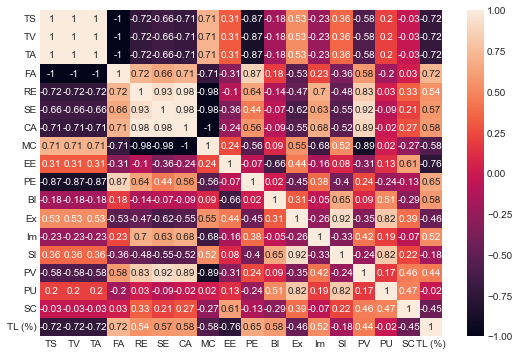

In [7]:
correlation_matrix=evaluation_df.corr().round(2)
plt.figure(figsize=(9,6))
sns.heatmap(data=correlation_matrix, annot=True)

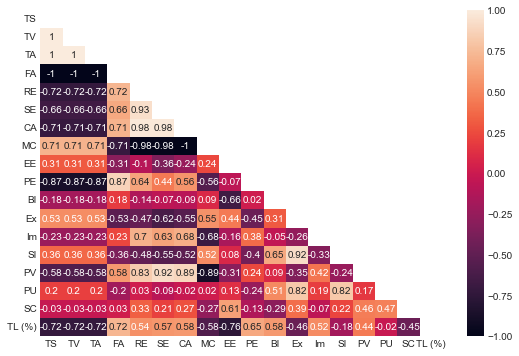

In [8]:
# Steps to remove redundant values
# Return a array filled with zeros
mask = np.zeros_like(correlation_matrix)
# Return the indices for the upper-triangle of array
mask[np.triu_indices_from(mask)] = True
# changing the figure size
plt.figure(figsize = (9, 6))
# "annot = True" to print the values inside the square
fig=sns.heatmap(data=correlation_matrix, annot=True, mask=mask);
plt.savefig('test.png', bbox_inches='tight')


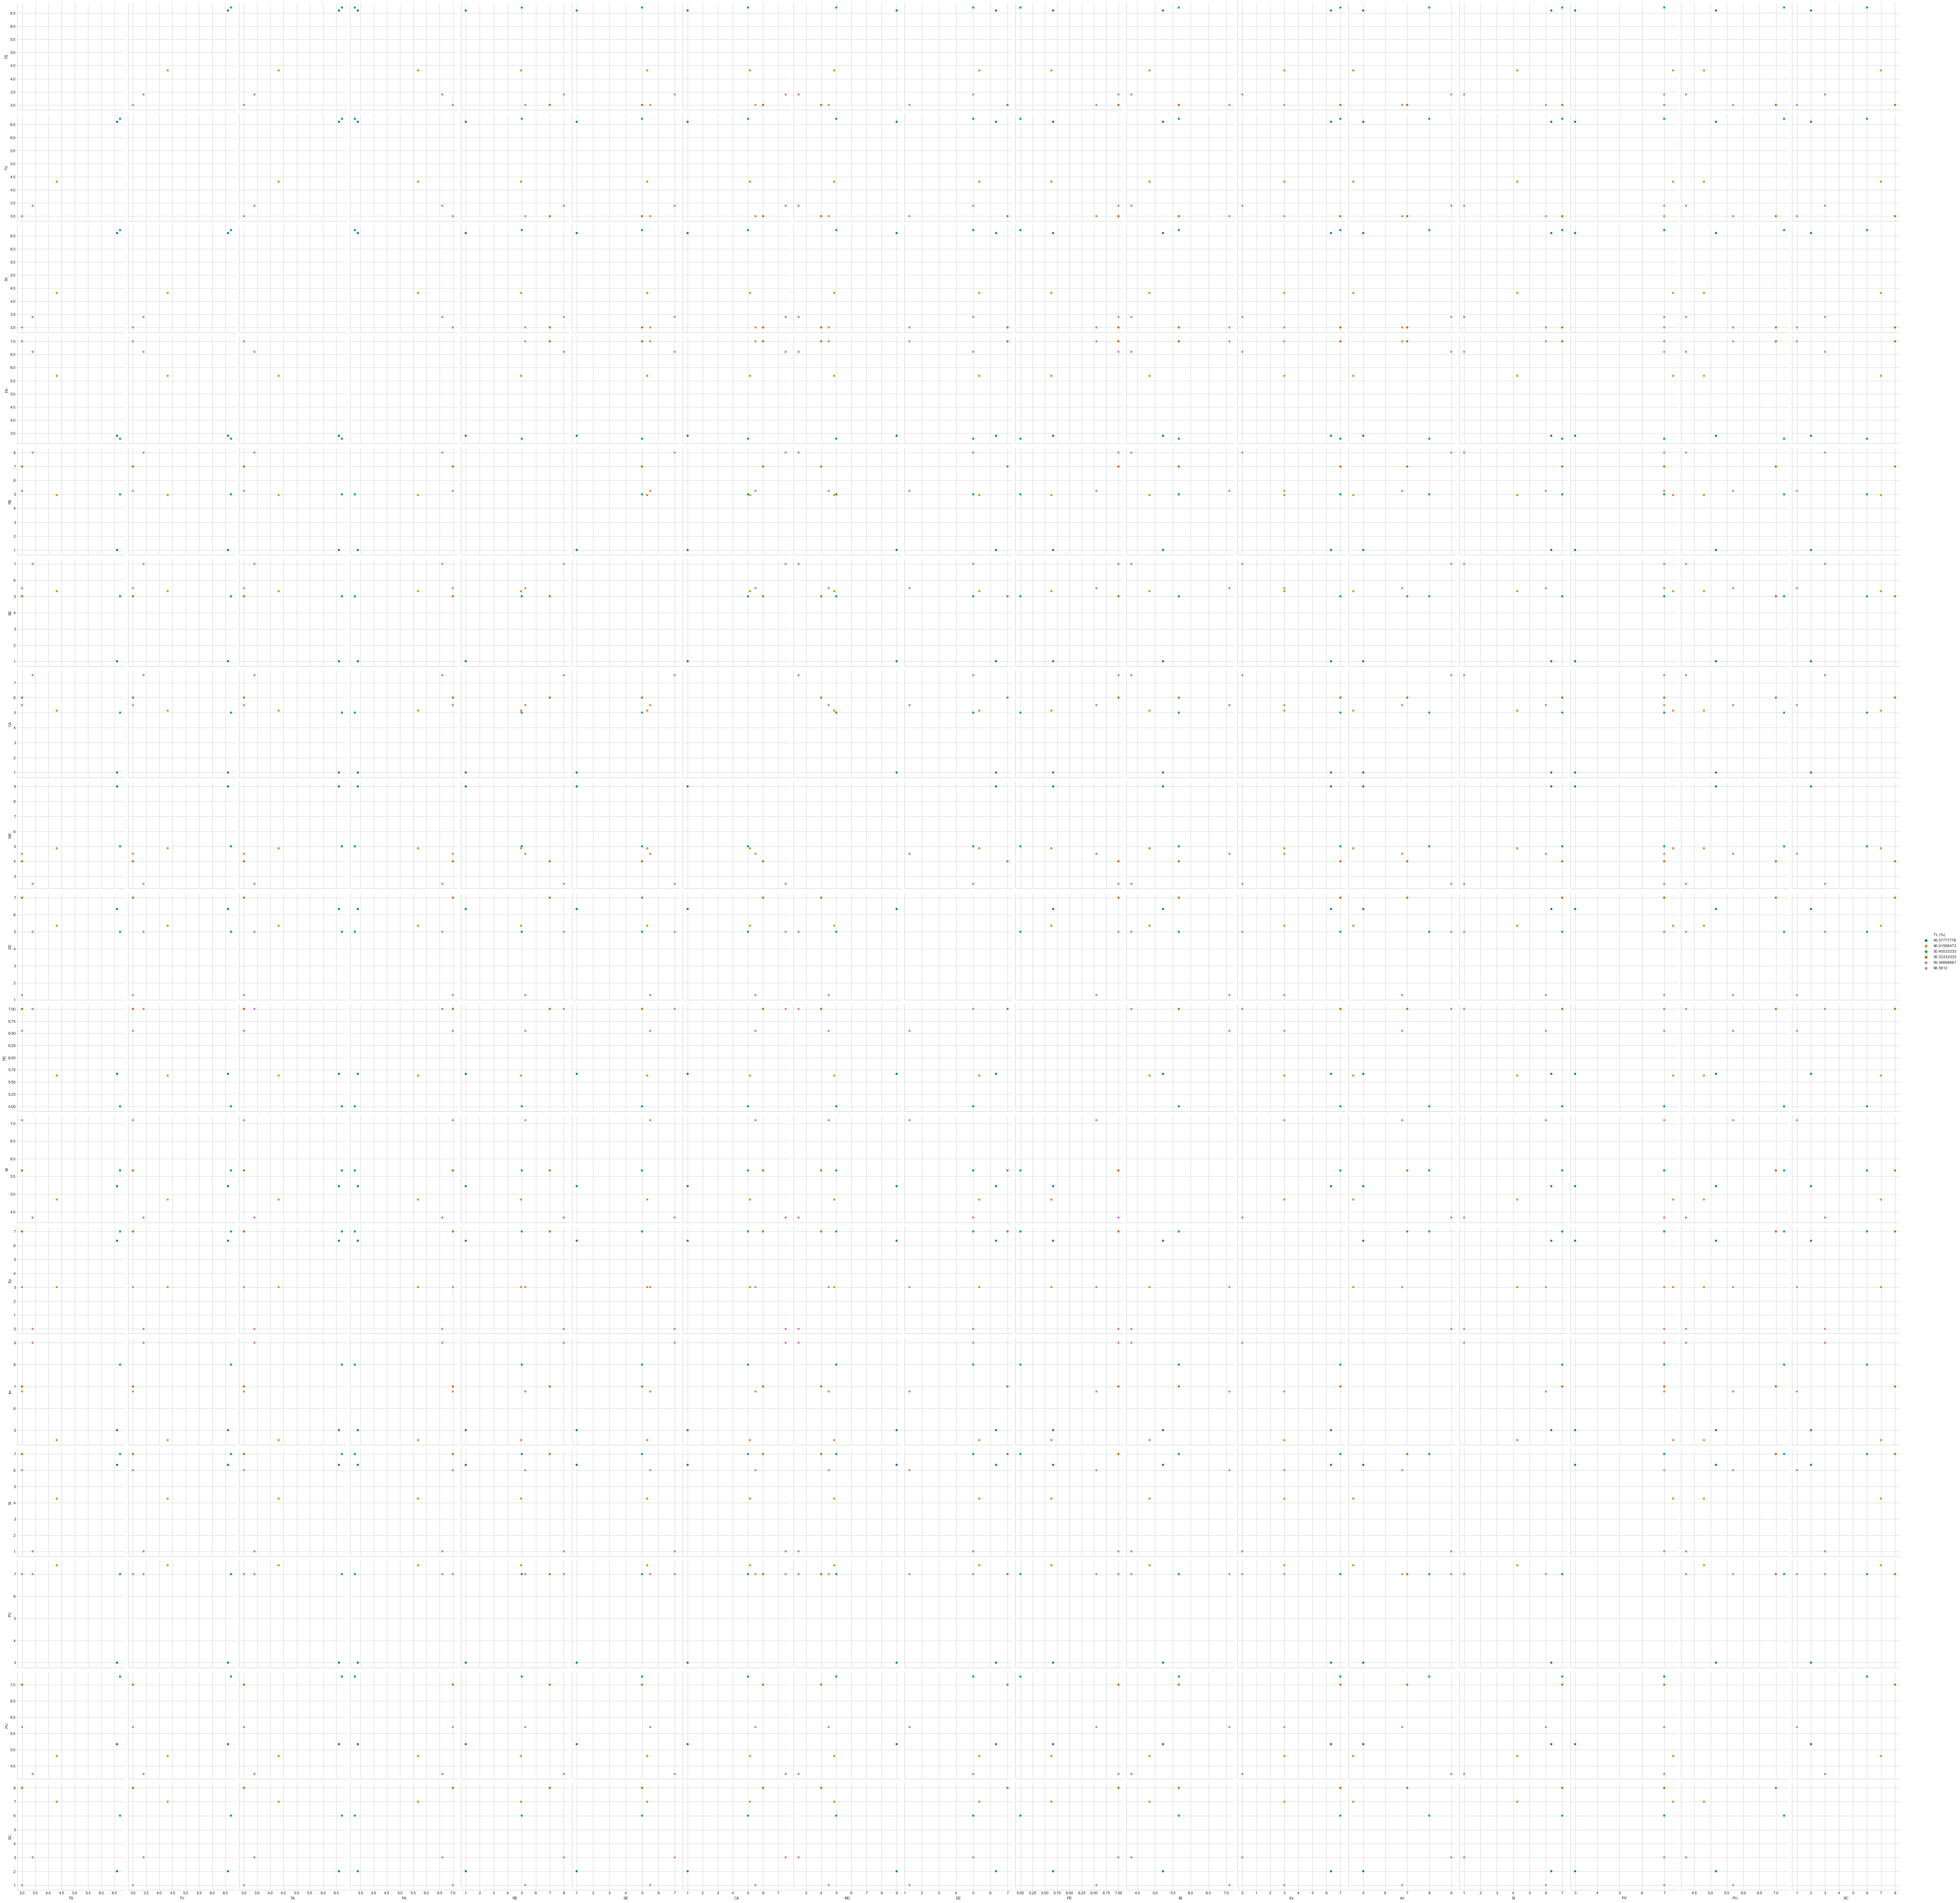

In [9]:
sns.pairplot(evaluation_df, hue="TL (%)",height=4, palette = 'colorblind');

In [10]:
X=evaluation_df[['TS','TV','RE','SE','SC','PE','EE','Ex','Im','SI']]
X

,TS,TV,RE,SE,SC,PE,EE,Ex,Im,SI
0,4.315789,4.315789,4.947368,5.315789,7,5.631579,5.352941,3.000000,4.545455,4.250000
1,3.000000,3.000000,7.000000,5.000000,8,7.000000,7.000000,7.000000,7.000000,7.000000
2,3.000000,3.000000,5.250000,5.500000,1,6.550000,1.285700,3.000000,6.770000,6.000000
3,6.600000,6.600000,1.000000,1.000000,2,5.666667,6.333333,6.333333,5.000000,6.333333
4,6.714000,6.714000,5.000000,5.000000,6,5.000000,5.000000,7.000000,8.000000,7.000000
5,3.400000,3.400000,8.000000,7.000000,3,7.000000,5.000000,0.000000,9.000000,1.000000


In [11]:
y=evaluation_df['TL (%)']
y

0    46.915065
1    55.333333
2    68.561200
3    45.577778
4    50.405333
5    59.366667
Name: TL (%), dtype: float64

In [12]:
#Create Model: Support Vector Machine (SVM)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.001, random_state = 16)
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (5, 10)
X_test shape:  (1, 10)
y_train shape:  (5,)
y_test shape:  (1,)


In [13]:
 # importing the necessary package to use the classification algorithm
from sklearn import svm #for Support Vector Machine (SVM) Algorithm
model_svm = svm.SVC() #select the algorithm
model_svm.fit(X_train, y_train) #train the model with the training dataset
y_prediction_svm = model_svm.predict(X_test) # pass the testing data to the trained model
# checking the accuracy of the algorithm. 
# by comparing predicted output by the model and the actual output
score_svm = metrics.accuracy_score(y_prediction_svm, y_test).round(4)
print("----------------------------------")
print('The accuracy of the SVM is: {}'.format(score_svm))
print("----------------------------------")
# save the accuracy score
score = set()
score.add(('SVM', score_svm))

ValueError: Unknown label type: 'continuous'

In [ ]:
 # importing the necessary package to use the classification algorithm
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm
model_dt = DecisionTreeClassifier(random_state=4)
model_dt.fit(X_train, y_train) #train the model with the training dataset
y_prediction_dt = model_dt.predict(X_test) #pass the testing data to the trained model
# checking the accuracy of the algorithm. 
# by comparing predicted output by the model and the actual output
score_dt = metrics.accuracy_score(y_prediction_dt, y_test).round(4)
print("---------------------------------")
print('The accuracy of the DT is: {}'.format(score_dt))
print("---------------------------------")
# save the accuracy score
score.add(('DT', score_dt))

In [ ]:
# importing the necessary package to use the classification algorithm
from sklearn.neighbors import KNeighborsClassifier # for K nearest neighbours
#from sklearn.linear_model import LogisticRegression # for Logistic Regression algorithm
model_knn = KNeighborsClassifier(n_neighbors=3) # 3 neighbours for putting the new data into a class
model_knn.fit(X_train, y_train) #train the model with the training dataset
y_prediction_knn = model_knn.predict(X_test) #pass the testing data to the trained model
# checking the accuracy of the algorithm. 
# by comparing predicted output by the model and the actual output
score_knn = metrics.accuracy_score(y_prediction_knn, y_test).round(4)
print("----------------------------------")
print('The accuracy of the KNN is: {}'.format(score_knn))
print("----------------------------------")
# save the accuracy score
score.add(('KNN', score_knn))


In [ ]:
 # importing the necessary package to use the classification algorithm
from sklearn.linear_model import LogisticRegression # for Logistic Regression algorithm
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train) #train the model with the training dataset
y_prediction_lr = model_lr.predict(X_test) #pass the testing data to the trained model
# checking the accuracy of the algorithm. 
# by comparing predicted output by the model and the actual output
score_lr = metrics.accuracy_score(y_prediction_lr, y_test).round(4)
print("---------------------------------")
print('The accuracy of the LR is: {}'.format(score_lr))
print("---------------------------------")
# save the accuracy score
score.add(('LR', score_lr))

In [ ]:
# importing the necessary package to use the classification algorithm
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB()
model_nb.fit(X_train, y_train) #train the model with the training dataset
y_prediction_nb = model_nb.predict(X_test) #pass the testing data to the trained model
# checking the accuracy of the algorithm. 
# by comparing predicted output by the model and the actual output
score_nb = metrics.accuracy_score(y_prediction_nb, y_test).round(4)
print("---------------------------------")
print('The accuracy of the NB is: {}'.format(score_nb))
print("---------------------------------")
# save the accuracy score
score.add(('NB', score_nb))

In [ ]:
print("The accuracy scores of different Models:")
print("----------------------------------------")
for s in score:
 print(s)
